In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [3]:
!wget $data -O data-week-3.csv

--2025-09-04 14:29:11--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  3.46MB/s    in 0.3s    

2025-09-04 14:29:12 (3.46 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [15]:
del df_train['churn']
del df_val['churn']
del df_test['churn']


In [16]:
df_full_train = df_full_train.reset_index(drop=True)

In [17]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [18]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [19]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [20]:
numerical = ['seniorcitizen', 'monthlycharges', 'totalcharges']

In [21]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [22]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [23]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [24]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [25]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [26]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [27]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [28]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [29]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [30]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [31]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

In [32]:
from IPython.display import display

In [33]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)    
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [36]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [37]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [38]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [39]:
def mutual_info_score_churn(series):
    return mutual_info_score(series, df_full_train.churn)

In [40]:
mi = df_full_train[categorical].apply(mutual_info_score_churn)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [41]:
df_full_train.tenure.max()

np.int64(72)

In [42]:
df_full_train[numerical].corrwith(df_full_train.churn)

seniorcitizen     0.141966
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [43]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [44]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [45]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [46]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [47]:
from sklearn.feature_extraction import DictVectorizer

In [48]:
df_train[['gender', 'contract', 'tenure']].iloc[:100]

,gender,contract,tenure
0,female,two_year,72
1,male,month-to-month,10
2,female,month-to-month,5
3,female,month-to-month,5
4,female,two_year,18
...,...,...,...
95,male,one_year,39
96,female,month-to-month,19
97,male,month-to-month,21
98,male,one_year,43


In [49]:
df_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'},
 'tenure': {0: 72, 1: 10, 2: 5, 3: 5, 4: 18, 5: 4, 6: 1, 7: 1, 8: 72, 9: 6}}

In [50]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_42978/535437261.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dicts = df_train[categorical + numerical].to_dict(orient='records')


In [51]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [52]:
dv = DictVectorizer(sparse=False)

In [53]:
x_train = dv.fit_transform(train_dicts)

In [54]:
x_train.shape

(4225, 44)

In [55]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

/tmp/ipykernel_42978/2096832447.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dicts = df_val[categorical + numerical].to_dict(orient='records')


In [56]:
x_val = dv.transform(train_dicts)

In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [63]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

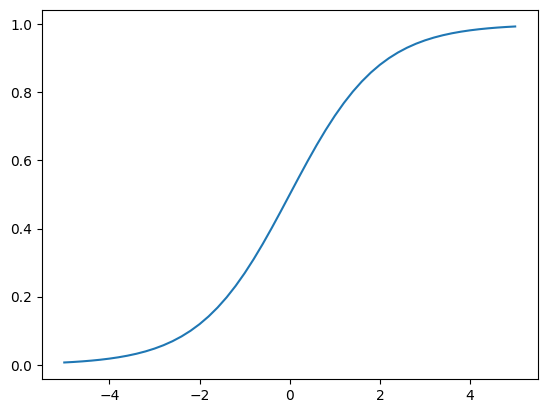

In [64]:
plt.plot(z, sigmoid(z))

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
model.intercept_[0]

np.float64(-0.249222705447024)

In [70]:
model.coef_[0].round(3)

array([ 0.586, -0.254, -0.579, -0.083, -0.163,  0.003, -0.17 , -0.079,
       -0.099, -0.147, -0.437,  0.36 , -0.17 ,  0.009, -0.236,  0.005,
       -0.015,  0.014, -0.17 , -0.091,  0.203, -0.17 , -0.279, -0.288,
        0.042, -0.159, -0.087, -0.186, -0.14 ,  0.052,  0.029,  0.005,
       -0.251,  0.172, -0.186, -0.17 ,  0.11 , -0.148, -0.17 ,  0.072,
        0.143, -0.17 , -0.22 , -0.   ])

In [76]:
y_pred = model.predict_proba(x_train)[:, 1]

In [79]:
churn_decision = (y_pred >= 0.5)

In [84]:
df_train[churn_decision].customerid

1       1960-uycnn
2       9250-wypll
3       6786-obwqr
6       1452-voqch
7       6653-cbbom
           ...    
4198    3755-jbmnh
4206    3186-baxnb
4208    5712-ptiww
4222    3703-vavcl
4224    1704-nrwye
Name: customerid, Length: 878, dtype: object

In [86]:
(y_train == churn_decision).mean()

np.float64(0.8)

In [87]:
churn_decision.astype(int)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [97]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_train

In [95]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [96]:
df_pred

,probability,prediction,actual,correct
0,0.034699,0,0,True
1,0.687036,1,0,False
2,0.604909,1,1,True
3,0.692936,1,0,False
4,0.048481,0,0,True
...,...,...,...,...
4220,0.161297,0,0,True
4221,0.344155,0,0,True
4222,0.503862,1,1,True
4223,0.051785,0,0,True
